In [7]:
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime

In [2]:
#read data
data = pd.read_csv('coca.csv')
data = data.reindex(index=data.index[::-1])
data.index = range(827)
print data.head()

         Date       Open       High        Low      Close    Volume  Adj Close
0  2014-01-02  41.119999  41.230000  40.509998  40.660000  12698600  36.679448
1  2014-01-03  40.680000  40.730000  40.349998  40.459999  10403400  36.499027
2  2014-01-06  40.480000  40.590000  40.160000  40.270000  11036300  36.327628
3  2014-01-07  40.480000  40.720001  40.290001  40.389999  11872300  36.435880
4  2014-01-08  40.439999  40.439999  39.830002  39.939999  15339600  36.029933


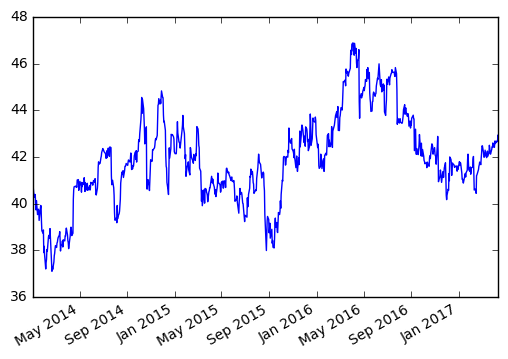

In [8]:
fig, ax = plt.subplots()
ax.plot_date(data['Date'], data['Close'], '-')
fig.autofmt_xdate()
plt.show()

In [3]:
#define variables
initial_value = 1000000 #trade size--1000 shares of coca 'KO' stock, assume I have enough fund to buy 1000 shares
mp = 0 #market position--indicate wheter I have any KO stocks on hands: 0 means none shares; 1 menas have shares
iD = 0 #initial date--indicate the index of the first date during calculation 
Ratio = np.zeros((51,2)) #profit ratio
    
#define functions
def min_per_day(x):
    y = data.iloc[x].as_matrix()
    mpd = y[1:4].min()
    return mpd

def close_p(x):
    cp = data.iloc[x][4]
    return cp

def open_p(x):
    op = data.iloc[x][1]
    return op

In [4]:
for k in range(51):
    iD = 0
    initial_value = 1000000
    Stop_pct = 0.005 + k * 0.0001
    while (iD <= 820):        
        if mp == 0:
            df_temp = data[iD:iD+5]
            HH = df_temp['High'].max()
            #print HH
            iD = iD + 5
#            test = iD

#            for n in range(0,5):
#                if HH < open_p(iD+n):
#                    break
#            if test + 4 == iD + n:
#                iD = iD + n + 1
#                mp = 0

#            else:
#                iD = iD + n
            while HH > open_p(iD) and iD<=820:
                iD += 1
            #print iD
            ep = open_p(iD) #ep is entry price
            #print ep
            Ts = initial_value / ep
            #print Ts
            pp = ep #pp is the previous peak price
            mp = 1

        if mp == 1:
            if close_p(iD) > pp:
                pp = close_p(iD)
            #print pp
            sp = pp * (1 - Stop_pct) #sp is the stop-point of trading, shares sold at this price
            iD = iD + 1

            while sp < min_per_day(iD) and iD<=820:
                iD = iD + 1
            #print iD
            end_value = open_p(iD) * Ts #the value of my fund after selling all shares
            #print open_p(iD),end_value
            initial_value = end_value
            mp = 0
#    if mp == 1:
#        end_value = sp * Ts
#    if mp == 0:
#        end_value = initial_value

    
    Ratio[k][0] = Stop_pct
    Ratio[k][1] = (end_value - 1000000)/1000000
    
#    mp = 0
#    iD = 0
    #break


In [5]:
Ratio

array([[ 0.005     ,  0.01361709],
       [ 0.0051    ,  0.01361709],
       [ 0.0052    ,  0.01361709],
       [ 0.0053    ,  0.01361709],
       [ 0.0054    ,  0.01361709],
       [ 0.0055    ,  0.01361709],
       [ 0.0056    ,  0.01361709],
       [ 0.0057    ,  0.01241917],
       [ 0.0058    ,  0.01241917],
       [ 0.0059    ,  0.01241917],
       [ 0.006     ,  0.01241917],
       [ 0.0061    ,  0.01241917],
       [ 0.0062    ,  0.01241917],
       [ 0.0063    ,  0.00250535],
       [ 0.0064    ,  0.00250535],
       [ 0.0065    ,  0.00250535],
       [ 0.0066    ,  0.00344549],
       [ 0.0067    , -0.00428749],
       [ 0.0068    , -0.00428749],
       [ 0.0069    , -0.00428749],
       [ 0.007     , -0.00428749],
       [ 0.0071    , -0.00428749],
       [ 0.0072    , -0.00428749],
       [ 0.0073    , -0.00428749],
       [ 0.0074    , -0.00428749],
       [ 0.0075    , -0.00428749],
       [ 0.0076    , -0.00428749],
       [ 0.0077    , -0.00428749],
       [ 0.0078    ,

In [6]:
Return_Ratio = pd.DataFrame({'Stop Precent':Ratio[:,0],'Return Ratio':Ratio[:,1],})
Return_Ratio = Return_Ratio[['Stop Precent','Return Ratio']]

In [7]:
Return_Ratio

,Stop Precent,Return Ratio
0,0.0050,0.013617
1,0.0051,0.013617
2,0.0052,0.013617
3,0.0053,0.013617
4,0.0054,0.013617
5,0.0055,0.013617
6,0.0056,0.013617
7,0.0057,0.012419
8,0.0058,0.012419
9,0.0059,0.012419


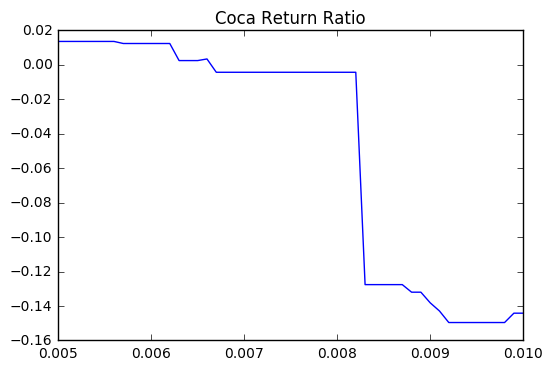

In [8]:
fig, ax = plt.subplots()
ax.plot(Ratio[:,0],Ratio[:,1])
ax.set_title('Coca Return Ratio')
plt.show()